# How many bias frames do I need?

Bias is an additive structure in a CCD image. Assume the bias structure is drawn from a normal distribution and you want to measure it. Take a single frame, that frame has variance that is equivalent to the quadratic sum of  read noise and the standard deviation of the bias. 

Here I do a simple numerical simulation to figure out the number of frames needed.

Nick Konidaris
npk@carnegiescience.edu


In [1]:
import numpy as np
%matplotlib inline
from pylab import *

Pretend that bias is a random normal draw with unit variance.

In [10]:
bias = np.random.randn(100)

Now simulate measuring it with a detector that has muRN x bias "noise".

In [56]:
sigs = []

muRN=5
bias = np.random.randn(1000)
realization = np.random.randn(len(bias))*muRN + bias
for i in range(1000):
    sigs.append(np.std(realization)/(i+1))
    RN = np.random.randn(len(bias))*muRN
    realization += RN + bias
    

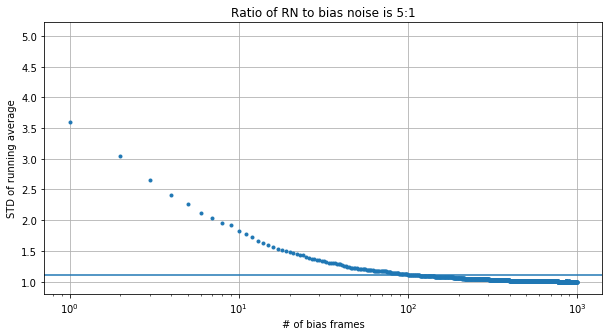

In [57]:
figure(figsize=(10,5))
semilogx(sigs,'.')
axhline(1.1)
grid(True)
title("Ratio of RN to bias noise is %s:1" % muRN)
xlabel("# of bias frames")
ylabel("STD of running average")

In [58]:
sigs[0]

5.0241118002745937